# Lab-6: Kernel SVM, Neural Nets
_____
##### In this lab, you will experiment with different kernels in SVM and implement NN step by step.

### Objectives:
1. Explore SVM kernel types
2. Understand basic steps of NN

## Kernel SVM

1. What is called a kernel trick? <span style="color:blue"> It is when instead of searching hyperplane in the initial space, we are searching it in some higher-dimensional space, where projected points are linearly separable. It is called a trick because we don't actually have to project points to that space - if we know how to compute their inner products there, this is enough => saves a lot of time. </span>

### Most popular kernel types

![image.png](attachment:image.png)

In [4]:
from IPython import display
from IPython.core.display import HTML 
display.Image(url= "https://www.researchgate.net/profile/Marouane-Hachimi/publication/340610860/figure/fig4/AS:880021191286786@1586824810950/Non-linear-classifier-using-Kernel-trick-16_W640.jpg")

### Generating data

/Users/nikitagurov/opt/anaconda3/envs/introml/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  del sys.path[0]
/Users/nikitagurov/opt/anaconda3/envs/introml/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
/Users/nikitagurov/opt/anaconda3/envs/introml/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


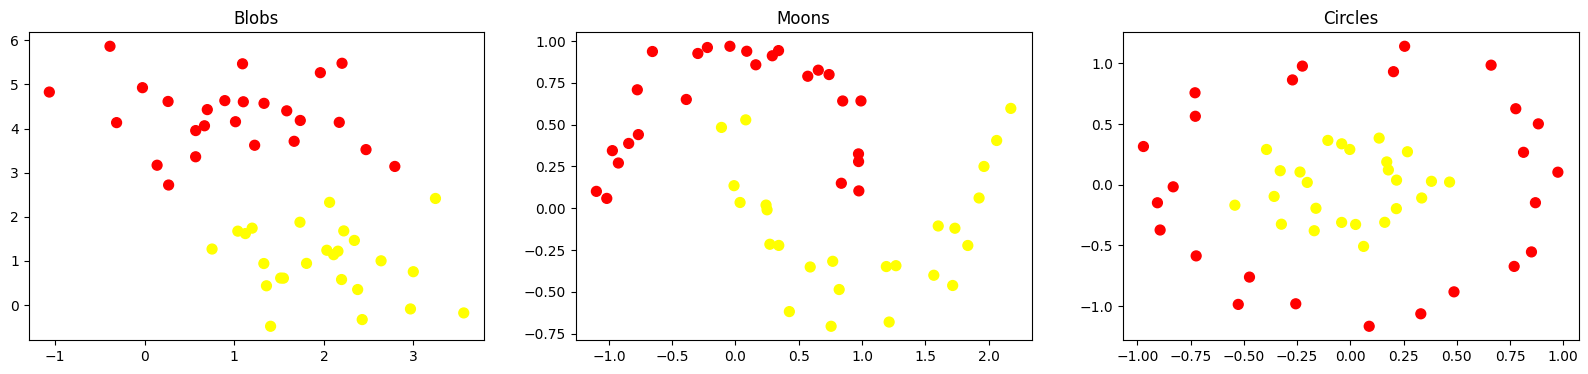

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles

# here we assign values for constants
n_samples = 50
C_const = 100

plt.figure(figsize=(20,4))

# generating linearly separable data
X_blob, Y_blob = make_blobs(n_samples=n_samples, centers=2, random_state=0, cluster_std=0.8)
plt.subplot("131")
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=Y_blob, s=50, cmap='autumn')
plt.title("Blobs")

# generating moon-shaped data
X_moon, Y_moon = make_moons(n_samples=n_samples, noise=0.1, random_state=0)
plt.subplot("132")
plt.title("Moons")
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=Y_moon, s=50, cmap='autumn')

# generating concentric data
X_circle, Y_circle = make_circles(n_samples=n_samples, factor=0.3, noise=0.1, random_state=0)
plt.subplot("133")
plt.title("Circles")
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=Y_circle, s=50, cmap='autumn')
plt.show()

In [2]:
# plotting function from the last lab, for your use
def plot_svc_decision_function(model, ax=None, plot_support=False):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=30, marker = "x", color="k")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Trying out different kernels

Task: For each dataset, try at east three kernels (linear, rbf, polynomial) with default patameters and plot the results. Analyze them.

In [3]:
# test kernels for each dataset
from sklearn.svm import SVC
def test_kernels(X, Y):
    plt.figure(figsize=(20,4))

    linear_model = SVC(kernel='linear')
    linear_model.fit(X, Y)
    plt.subplot("131")
    plt.title("Linear kernel")
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
    plot_svc_decision_function(linear_model)

    rbf_model = SVC(kernel='rbf')
    rbf_model.fit(X, Y)
    plt.subplot("132")
    plt.title("RBF kernel")
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
    plot_svc_decision_function(rbf_model)

    poly_model = SVC(kernel='poly')
    poly_model.fit(X, Y)
    plt.subplot("133")
    plt.title("Polynomial kernel")
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
    plot_svc_decision_function(poly_model)
    plt.show()

/Users/nikitagurov/opt/anaconda3/envs/introml/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  
/Users/nikitagurov/opt/anaconda3/envs/introml/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/nikitagurov/opt/anaconda3/envs/introml/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


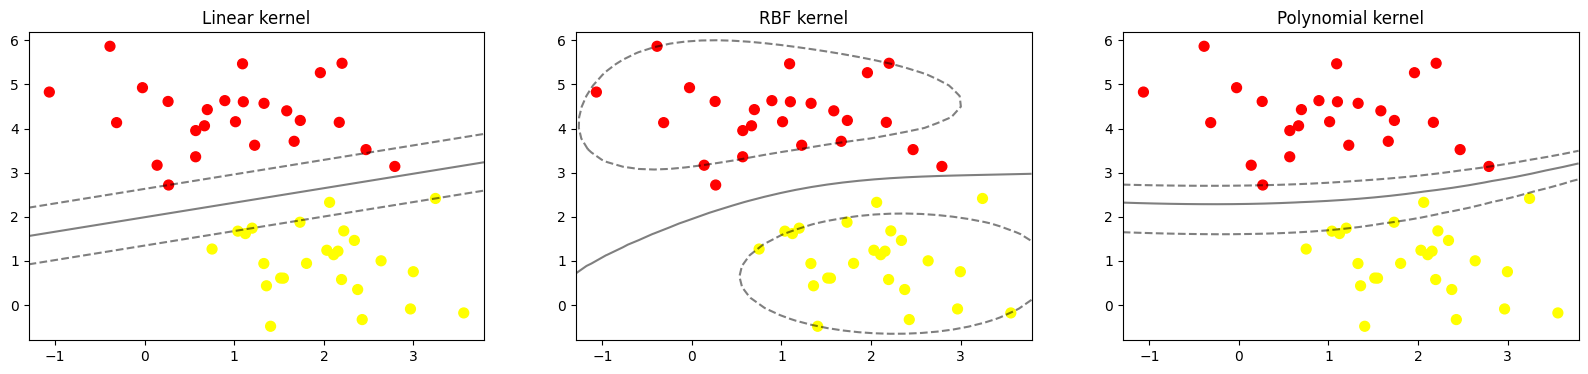

In [4]:
test_kernels(X_blob, Y_blob)

/Users/nikitagurov/opt/anaconda3/envs/introml/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  
/Users/nikitagurov/opt/anaconda3/envs/introml/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/nikitagurov/opt/anaconda3/envs/introml/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


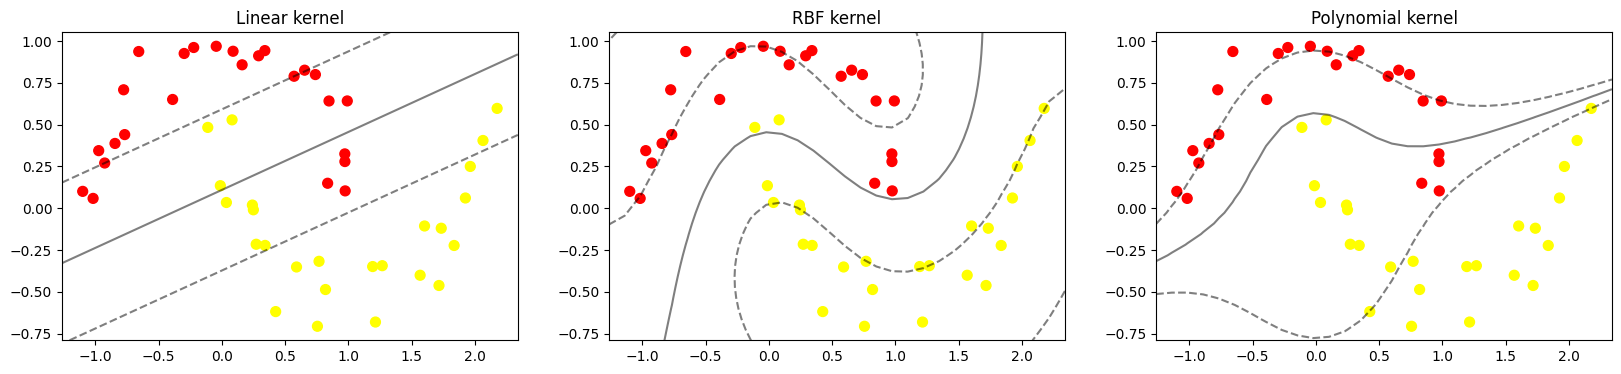

In [5]:
test_kernels(X_moon, Y_moon)

/Users/nikitagurov/opt/anaconda3/envs/introml/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  
/Users/nikitagurov/opt/anaconda3/envs/introml/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/nikitagurov/opt/anaconda3/envs/introml/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


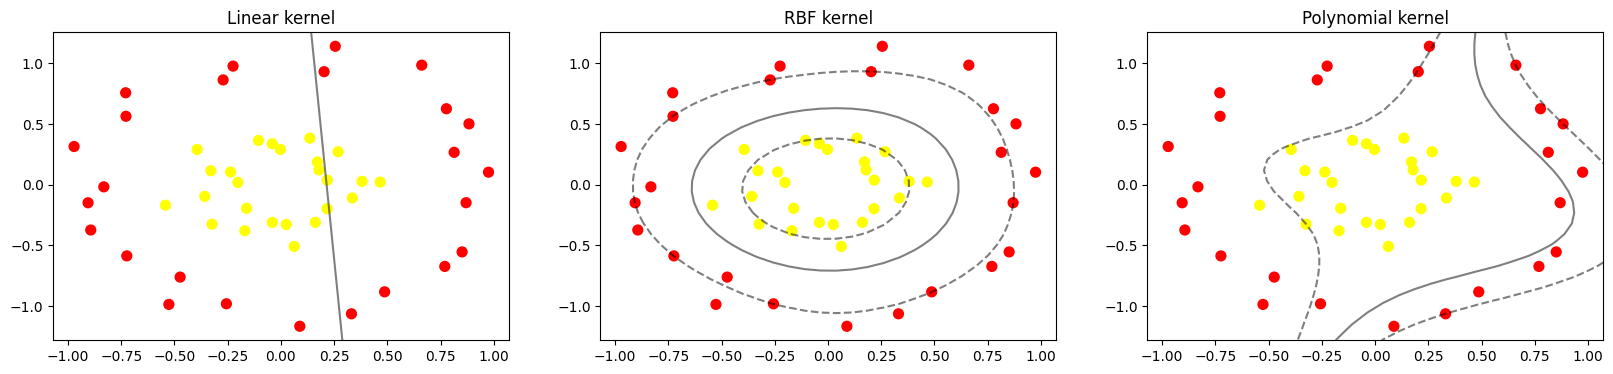

In [6]:
test_kernels(X_circle, Y_circle)

### Exploring parameters effect
Task: Try playing with C, gamma, degree parameters on the moons dataset - choose ones that you think perform best.

**gamma** - determines how close should the point be to hyperplane to have any impact on it. The lower the gamma, the more elements, even those that are far enough from the dividing line, take part in the process of choosing this very line. If, however, the gamma is high, then the algorithm will "rely" only on those elements that are closest to the line itself.

If you set the gamma level too high, then only the elements closest to the line will participate in the process of deciding on the position of the line. This will help ignore outliers in the data.



![alt text](http://cs604525.vk.me/v604525210/afd4/xuJnTRcY43g.jpg)

In [7]:
def test_kernel(kernel, X, Y, C=1, gamma='scale', degree=3):
    model = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree)
    model.fit(X, Y)
    plt.title(kernel + " kernel")
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')
    plot_svc_decision_function(model)

In [8]:
# Manually tune parameters for the moons dataset, plotting the result
test_kernel('rbf', X_moon, Y_moon, C=20, gamma=1)

    
    

### Neural nets

In [16]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


In [17]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [36]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_29 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [37]:
batch_size = 128
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 71us/sample - loss: 0.8349 - accuracy: 0.7378 - val_loss: 0.2229 - val_accuracy: 0.9410

In [28]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])



Test loss: 0.12060089937183074
Test accuracy: 0.967


## Try to change num of layers, their types, activations and optimizers